<a href="https://colab.research.google.com/github/dalatorrem/Diplomado_Metodos_UCentral_2023/blob/main/Lectura_15_Simple_Linear_Regression_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<p align="center">
  <img src="https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/images/imagen_ucentral.jpg" alt="logo_Ucentral" width="400px" height="300px">
</p>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
##
from sklearn.linear_model import LinearRegression                      ## Modelo lineal.
## Parte estadística.
import statsmodels.formula.api  as smf                                 ## Modelos lineal.
from scipy.stats import shapiro, probplot                              ## libreria estadística de Scipy
from statsmodels.stats.anova import anova_lm                           ## Anova del modelo lineal
##
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"

# ***Regresión lineal simple.***

Consideremos la siguiente situación:

Se ha recolectado información sobre 122 individuos, cada uno de ellos respondió por:


1. ***`Exposure`:*** Numéro de años que el trabajador estuvo expuesto al polvo de algodón.

2. ***`PEFR`:*** Proporciona una medida de la capacidad pulmonar del trabajador ([tasa de flujo respiratorio](https://en.wikipedia.org/wiki/Peak_expiratory_flow)).

***¿Cómo se relaciona el `PEFR` con `Exposure`?***

In [ ]:
url_data = "LM_simple_example_1.csv"
df = pd.read_csv(url_base+url_data,)
df.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PEFR      122 non-null    int64
 1   Exposure  122 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


Primero veamos la relación vía un scatterplot:

In [ ]:
fig = px.scatter(df, x = "Exposure", y = "PEFR", template = "plotly_white",
                 title = "Scatterplot: Exposure vs. PEFR")
fig.show()

In [ ]:
corr_coef = df.corr().iloc[0,1]
print("El coeficiente de correlación de Pearson es: {:.4f}".format(corr_coef))

El coeficiente de correlación de Pearson es: -0.2770


Un modelo de ***regresión lineal simple*** estima cuánto cambiará `PERF` cuando `Exposure` cambie en un
cierta cantidad. Es decir, deseamos explicar si las diferencias en los niveles de `PERF` se asocian con las diferencias en los años de exposición (`Exposure`). Nuestro modelo será en este caso:


$$PERF = \beta_0 +\beta_1*Exposure+\epsilon$$

$\beta_0$ es una constante conocida como
el intercepto, $\beta_1$ será la pendiente, ambos de denominan parámetros de la regresión. $\epsilon$ es un error o ruido que NO se logra explicar con el modelo. La ***regresión lineal simple*** trata de encontrar la "mejor" recta para predecir la variable ***Target*** `PEFR` como una función de la ***feature*** `Exposure`



Hacemos uso de [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
## Ajuste de regresión con sklearn
model_lm = LinearRegression()
###
y = df["PEFR"]                                            ## Target.
X = df.drop(columns = ["PEFR"])                           ## Feature.
model_lm.fit(X = X, y = y)
##
print(f"Intercepto: {model_lm.intercept_:.3f}")
print(f"Coeficiente Exposure: {model_lm.coef_[0]:.3f}")

Intercepto: 424.583
Coeficiente Exposure: -4.185


En caso que seleccionemos este ajuste muestro modelo será:

$$PEFR = 424.583-4.185*Exposure+\epsilon$$

La interpretación de los coeficientes es la siguiente:

1. $\hat{\beta_0}=424.583$: Es el intercepto del modelo, note que para un valor de $Exposure=0$, se obtiene que $PEFR=424.583$, así, se espera que un trabajador sin exposición tenga ese valor medio del indicador de respiración.

2. $\hat{\beta_1}=-4.185$: Por cada aumento unitario en la variable $Exposure$ se espera que $PEFR$ disminuya en promedio el valor en $\hat{\beta_1}$

Veamos la recta de ajuste:

In [ ]:
## Regresión simple, recta de ajuste por OLS.
fig = px.scatter(df, x = "Exposure", y = "PEFR", template = "plotly_white",
                 title = "Recta de ajuste por OLS", trendline="ols",
                 trendline_color_override="yellow")
fig.show()

### ***Valores ajustados y residuales.***



Los conceptos importantes en el análisis de regresión son los valores ajustados (las predicciones con el modelo) y los residuales (errores de predicción). En general, para $Y$ variable target y $X$ variable explicativa o (feature para predicir), los datos no caen exactamente en la recta de ajuste, por lo que la ecuación de regresión debe incluir un término de error explícito $\epsilon_i$


$$Y_i=\beta_0+\beta_1*X+ϵ_i$$


Los ***valores ajustados***, denotados por $\hat{Y_i}$ vienes dados por la expresión:


$$\hat{Y_i}=\hat{\beta_0}+\hat{\beta_1}*X_i$$



La diferencia entre el valor predicho por la línea y el valor real (el punto de datos) es el error o ***residual*** (representado arriba como la letra griega $\epsilon$ (épsilon)). Calculamos los residuos estimados ($\hat{\epsilon_i}$) mediante:


$$\hat{\epsilon_i}=Y_i-\hat{Y_i}$$





Este diagrama resume las ideas anteriores:

<div align="center"><img src='https://raw.githubusercontent.com/lacamposm/Fundamentos_Analitica/main/images/line_best_fit_explained.jpg' width=500>
</div>


In [ ]:
### With sklearn
fitted = model_lm.predict(X) ### Valores ajustados Yi^
resid = y - fitted           ### Residuales estimados.

In [ ]:
### pd.DataFrame con los primeros resultados del ajuste
pd.DataFrame({"valor_observado":y, "valor_ajustado":fitted,"residual":resid})

,valor_observado,valor_ajustado,residual
0,390,424.582807,-34.582807
1,410,424.582807,-14.582807
2,430,424.582807,5.417193
3,460,424.582807,35.417193
4,420,420.398230,-0.398230
...,...,...,...
117,450,332.522124,117.477876
118,490,332.522124,157.477876
119,500,332.522124,167.477876
120,370,328.337547,41.662453


## ***Anova***

Dado que queremos explicar la variabilidad de la variable `Target` con respecto a su media podemos descomponerla de la siguiente manera:

$$\sum_{i=1}^{n}(y_i-\bar{y})^{2}=\sum_{i=n}^{n}(y_i-\hat{y_i})^{2}+\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^{2}$$

En la expresión expresión anterior se identifican:

1. ***Suma de cuadrados totales***:
$$SCT = \sum_{i=1}^{n}(y_i-\bar{y})^{2}$$
  Esta suma determina la variabilidad respecto a su media.

2. ***Suma de cuadrados del error:***
$$SCE=\sum_{i=n}^{n}(y_i-\hat{y_i})^{2}$$
  Esta  suma toma en cuenta la variación con la recta estimada. La variación residual que queda sin explicar por la recta de regresión.
  
3. ***Suma de cuadrados de la regresión:***
$$SCR=\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^{2}$$
  La cantidad de variabilidad en las observaciones explicada por la recta regresión. Esta suma toma en cuenta la variación de las observaciones y es atribuible al efecto lineal del modelo.


Para ajustar modelos de regresión por mínimos cuadrados ordinarios vamos a hacer uso de [stastmodels](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html)

In [ ]:
model_lm_sm = smf.ols(formula = "PEFR ~ Exposure", data = df).fit()     ## Ajuste con statsmodels.
print(model_lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Mon, 24 Oct 2022   Prob (F-statistic):            0.00201
Time:                        20:26:18   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    424.5828     20.796     20.417      0.0

In [ ]:
## With statsmodels. from statsmodels.stats.anova import anova_lm ---> Anova del modelo lineal
anova_lm(model_lm_sm, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Exposure,1.0,1.026333e+05,102633.255269,9.974366,0.002008
Residual,120.0,1.234764e+06,10289.702381,NaN,NaN


***La tabla anterior es una típica ANOVA***.

El estadístico $F_{1}^{n-2}$ se utiliza para contrastar el sistema de hipótesis:

$$H_0:\beta_1=0$$
$$vs.$$
$$H_1:\beta_1\neq 0$$

Es decir, este ***mide la pertinencia o no del modelo (Significancia global del modelo).***

Para el caso específico de nuestro problema el $p$-valor de la prueba es $0.002008$, es decir, ***podemos explicar las diferencias en la variable `PEFR` con las diferencias existentes en la variable `Exposure`.***

### ***$p$-valores.***

Para cada coeficiente en la tabla de salida anterior, hay $p$-valor asociados. Esto se debe a que los coeficientes se estiman en función de nuestros datos disponibles, por lo que es posible que no representen necesariamente el coeficiente "verdadero" en toda la población. La hipótesis nula que se está probando aquí para $\beta_1$ es:

$$ H_0: \beta_1 = 0 $$
$$vs.$$
$$ H_1: \beta_1 \neq 0.$$

y de manera similar para $\beta_0$. El $p$-valor de $\beta_1$ (debajo de la columna: `P>|t|` en la tabla) es 0.002. Por lo tanto, la diferencia entre cero y $\beta_1$ es estadísticamente significativa al nivel de significancia de 0.05 y rechazamos la hipótesis nula. Esto implica que `Exposure` sí está asociada con al menos algunas de las diferencias de `PEFR`.

Si un coeficiente en su modelo no es estadísticamente significativo, significa que, suponiendo que su modelo represente la realidad de manera razonablemente correcta, no existe una asociación perceptible entre esa variable y su variable de salida.

### ***Coeficiente de determinación $R^{2}$.***

El coeficiente de determinación se encuentra con la fórmula:

$$R^{2}=\frac{SCR}{SCT}=1-\frac{SCE}{SCT}$$

Al ser $SCT$ una medida de la variabilidad de $Y$ sin considerar el efecto de la variable regresora y $SCE$ es una medida de la variabilidad de $Y$ que queda después de haber tenido en consideración a $X$, el coeficiente de determinación, $R^{2}$ se llama con frecuencia la proporción de la variación explicada por el regresor $X$. Este valor va de 0 y hasta 1, valores cercanos a 1 implican que la mayor parte de la variabilidad de $Y$ está explicada por el modelo de regresión.

Cuanto mayor sea $R^ 2$, mayor es el porcentaje de variación observada que puede ser explicado por el modelo. Puede considerarlo como un indicador de qué tan bien coincidirán sus predicciones con los puntos de datos reales; es decir, cuando $R^2=1$ las predicciones de su modelo son perfectas, y cuando $R^2=0$ están tan lejos que son básicamente inútiles. Por lo tanto, se dice que $R^2$ es una representación de la **bondad de ajuste** del modelo.



Aquí hay dos modelos de ejemplo: uno con una alta bondad de ajuste y otro con una bondad de ajuste razonable pero notablemente más baja:

<div align="center"><img src='https://raw.githubusercontent.com/lacamposm/Fundamentos_Analitica/main/images/high_low_r_2.png' width=200>
</div>

In [ ]:
###
SCE = 1.234764e+06                      ## Suma de cuadrados del error.
SCR = 1.026333e+05	                    ## Suma de cuadrados de la regresión.
SCT = (1.234764e+06+1.026333e+05)
R_2 = 1- SCE/SCT
print("El valor de R^2 es: {:.4f}".format(R_2))
print("Por lo tanto el {:.2f}% de la variabilidad de PEFR queda explicada por el modelo.".format(R_2*100))
###
print()
print("R^2 Con sklearn:", model_lm.score(X,y))
### Con statsmodels
print()
print("Suma de cuadrados del error:", model_lm_sm.ssr)
print("Suma de cuadrados de la regresión:", model_lm_sm.mse_model)
print("Suma de cuadrados totales:", model_lm_sm.centered_tss)
print("R^2 con statsmodels:", model_lm_sm.rsquared)

El valor de R^2 es: 0.0767
Por lo tanto el 7.67% de la variabilidad de PEFR queda explicada por el modelo.

R^2 Con sklearn: 0.0767410228628338

Suma de cuadrados del error: 1234764.285714286
Suma de cuadrados de la regresión: 102633.25526932045
Suma de cuadrados totales: 1337397.5409836064
R^2 con statsmodels: 0.07674102286283369


## ***Análisis de residuales***

1. Debemos verificar que los residuales no estén correlacionados.
2. Homocedasticidad.
3. Que los residuales distribuyan aproximadamente normal


En primera medida debemos estimar el valor de $\sigma^{2}$, este valor está dado por la expresión:

$$\hat{\sigma}^{2}=\frac{SCE}{n-1}$$

***Que no es otra cosa que el cuadrado medio del error.***



In [ ]:
## Estimación de sigma^2.
sigma_2 = 10289.702381
print("La estimación de la variabilidad del modelo es:", sigma_2)
## Estimación de sigma^2 con statsmodels.
print("La estimación de sigma^2 con statsmodels es:",model_lm_sm.scale)

La estimación de la variabilidad del modelo es: 10289.702381
La estimación de sigma^2 con statsmodels es: 10289.702380952383


### ***Normalidad.***

In [ ]:
## NORMALIDAD: Test de Shapiro-Wills
## La prueba de Shapiro-Wilk prueba la hipótesis nula de que los datos se extrajeron
## de una distribución normal.
p_value1 = shapiro(df["PEFR"])[1]                                   ### Normalidad variable respuesta
print("El p-valor del Test de Shapiro-Wills para la variable respuesta es: {:.3f}".format(p_value1))
##
p_value2 = shapiro(resid)[1]
print("El p-valor del Test de Shapiro-Wills para normalidad de los residuales:{:.3f}".format(p_value2))

El p-valor del Test de Shapiro-Wills para la variable respuesta es: 0.541
El p-valor del Test de Shapiro-Wills para normalidad de los residuales:0.586


Luego no podemos rechazar la hipótesis nula, por lo tanto no tenemos evidencia estadística para decir que los residuales no distribuyen aproximadamente normal.

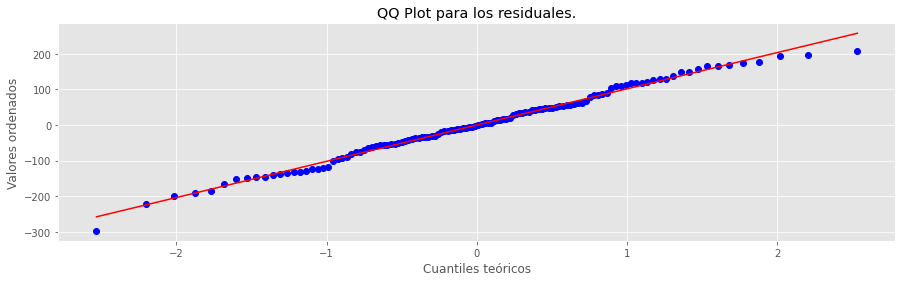

In [ ]:
## QQ plot para los residuales observados. from scipy.stats import probplot
plt.figure(figsize = (15,4))
probplot(x=resid, dist="norm", plot=plt)              ## QQ-plot.
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para los residuales.")
plt.show()

Como ***conclusión*** notemos que se cumplen los supuestos del modelo, pero el poder explicativo del modelo solo llega al $7.67\%$, lo cual no es un buen indicador.